#    CNN model to predict dog or cat

In [2]:
import keras
from keras import models
from keras import layers
from keras.models import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [7]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [8]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])#binary_crossentropy

In [9]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,
                                 height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [10]:
train_dir='/home/linuxbox/Desktop/DEEP-LEARNING/Datasets/cats_and_dogs_small/train'
test_dir='/home/linuxbox/Desktop/DEEP-LEARNING/Datasets/cats_and_dogs_small/test'
validation_dir='/home/linuxbox/Desktop/DEEP-LEARNING/Datasets/cats_and_dogs_small/validation'

In [11]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),
                                                  batch_size=40,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),
                                                      batch_size=40,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
history=model.fit_generator(train_generator,steps_per_epoch=35,epochs=30,validation_data=validation_generator,validation_steps=100)

Epoch 1/30
35/35 [==============================] - 169s 5s/step - loss: 0.6957 - acc: 0.4950 - val_loss: 0.6864 - val_acc: 0.5930
Epoch 2/30
35/35 [==============================] - 165s 5s/step - loss: 0.6859 - acc: 0.5371 - val_loss: 0.6832 - val_acc: 0.5100
Epoch 3/30
35/35 [==============================] - 165s 5s/step - loss: 0.6824 - acc: 0.5607 - val_loss: 0.6683 - val_acc: 0.5720
Epoch 4/30
35/35 [==============================] - 165s 5s/step - loss: 0.6819 - acc: 0.5521 - val_loss: 0.6685 - val_acc: 0.5830
Epoch 5/30
35/35 [==============================] - 166s 5s/step - loss: 0.6787 - acc: 0.5693 - val_loss: 0.6640 - val_acc: 0.5950
Epoch 6/30
35/35 [==============================] - 165s 5s/step - loss: 0.6589 - acc: 0.6086 - val_loss: 0.6558 - val_acc: 0.5890
Epoch 7/30
35/35 [==============================] - 167s 5s/step - loss: 0.6674 - acc: 0.5921 - val_loss: 0.6475 - val_acc: 0.6080
Epoch 8/30
35/35 [==============================] - 170s 5s/step - loss: 0.6552 - a

In [14]:
model.save("classification.h5")

In [15]:
from keras.models import load_model
model = load_model('classification.h5')

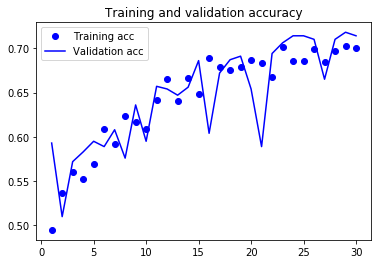

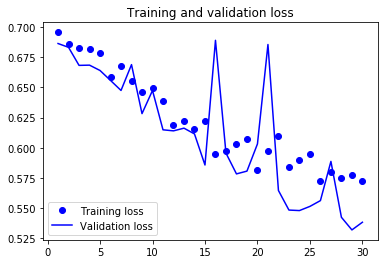

In [17]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()